In [ ]:
# This notebook will discuss different parsing types; Constituency parsing & Dependency parsing using nltk and spaCy libraries.
# Also contains the demo of different parser types using nltk functions.

# Constituency Parsing

Here we cover submodules of nltk.parse package.

<b>Parsing or syntax analysis or syntactic analysis</b> is the analysis of a string of symbols, conforming to the rules of a formal grammar.

#### Parsing using nltk.parse package

Reference - [nltk.parse package](https://www.nltk.org/api/nltk.parse.html)

In [1]:
import nltk
from nltk import nonterminals, Production, CFG
from nltk.parse.generate import generate

Each node in the parse tree is a constituent. A grammar specifies how the sentence can be subdivided into its immediate constituents

A <b>context-free grammar</b> G=(V,T,P,S) is composed of

V : a set of variables / non-terminals

T : a set of terminal symbols

P : a set of productions, rules that recursively define the structure of the language.

S : a starting symbol.

A production has the form A→α where,
A is a variable.
α is a string of zero or more symbol, either terminals or variables.

In [2]:
S, NP, VP = nonterminals('S, NP, VP')
N, V, P, DT = nonterminals('N, V, P, DT')

rule1 = Production(S, [NP, VP])
rule2 = Production(NP, [DT, NP])

print(rule1)
print(rule2)

S -> NP VP
NP -> DT NP


In [3]:
rule1.rhs()

(NP, VP)

In [4]:
grammar = CFG(S,[rule1,rule2])

grammar.productions()

[S -> NP VP, NP -> DT NP]

In [5]:
# example grammar
grammar = CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP | V RB
PP -> P NP
V -> "saw" | "ate" | "walking" | "slept" | "ran"
NP -> "John" | "Mary" | "Bob" | "ideas" | Det N | Det N PP | JJ NP
JJ -> "green" | "red" | "colorless"
RB -> "furiously" | "fastly" | "daily"
Det -> "A" | "An" | "The" | "My" | "the" | "a"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")
grammar.productions()

[S -> NP VP,
 VP -> V NP,
 VP -> V NP PP,
 VP -> V RB,
 PP -> P NP,
 V -> 'saw',
 V -> 'ate',
 V -> 'walking',
 V -> 'slept',
 V -> 'ran',
 NP -> 'John',
 NP -> 'Mary',
 NP -> 'Bob',
 NP -> 'ideas',
 NP -> Det N,
 NP -> Det N PP,
 NP -> JJ NP,
 JJ -> 'green',
 JJ -> 'red',
 JJ -> 'colorless',
 RB -> 'furiously',
 RB -> 'fastly',
 RB -> 'daily',
 Det -> 'A',
 Det -> 'An',
 Det -> 'The',
 Det -> 'My',
 Det -> 'the',
 Det -> 'a',
 N -> 'man',
 N -> 'dog',
 N -> 'cat',
 N -> 'telescope',
 N -> 'park',
 P -> 'in',
 P -> 'on',
 P -> 'by',
 P -> 'with']

In [6]:
#generating sample sentences from the CFG
for sentence in generate(grammar, n=10):
  print(' '.join(sentence))

John saw John
John saw Mary
John saw Bob
John saw ideas
John saw A man
John saw A dog
John saw A cat
John saw A telescope
John saw A park
John saw An man


#### Recursive Descent Parser

<b>Recursive descent</b> is a top-down parsing technique that constructs the parse tree from the top and the input is read from left to right.

The basic idea of recursive-descent parsing is to associate each non-terminal with a production. The goal of each such production is to read a sequence of input characters that can be generated by the corresponding non-terminal, and return a pointer to the root of the parse tree for the non-terminal.

The terminal symbol is compared to the input; if they agree, it consumes the terminal symbol in the input or 'match'.
For a non-terminal symbol, the corresponding production is called or 'expand'.


In [7]:
from nltk.parse import RecursiveDescentParser
rd = RecursiveDescentParser(grammar,trace=0)

In [8]:
from nltk.parse.recursivedescent import demo
demo()

S -> NP VP
NP -> Det N
NP -> Det N PP
VP -> V NP
VP -> V NP PP
PP -> P NP
NP -> 'I'
N -> 'man'
N -> 'park'
N -> 'telescope'
N -> 'dog'
Det -> 'the'
Det -> 'a'
P -> 'in'
P -> 'with'
V -> 'saw'
Parsing 'I saw a man in the park'
    [ * S ]
  E [ * NP VP ]
  E [ * Det N VP ]
  E [ * 'the' N VP ]
  E [ * 'a' N VP ]
  E [ * Det N PP VP ]
  E [ * 'the' N PP VP ]
  E [ * 'a' N PP VP ]
  E [ * 'I' VP ]
  M [ 'I' * VP ]
  E [ 'I' * V NP ]
  E [ 'I' * 'saw' NP ]
  M [ 'I' 'saw' * NP ]
  E [ 'I' 'saw' * Det N ]
  E [ 'I' 'saw' * 'the' N ]
  E [ 'I' 'saw' * 'a' N ]
  M [ 'I' 'saw' 'a' * N ]
  E [ 'I' 'saw' 'a' * 'man' ]
  M [ 'I' 'saw' 'a' 'man' ]
  E [ 'I' 'saw' 'a' * 'park' ]
  E [ 'I' 'saw' 'a' * 'telescope' ]
  E [ 'I' 'saw' 'a' * 'dog' ]
  E [ 'I' 'saw' * Det N PP ]
  E [ 'I' 'saw' * 'the' N PP ]
  E [ 'I' 'saw' * 'a' N PP ]
  M [ 'I' 'saw' 'a' * N PP ]
  E [ 'I' 'saw' 'a' * 'man' PP ]
  M [ 'I' 'saw' 'a' 'man' * PP ]
  E [ 'I' 'saw' 'a' 'man' * P NP ]
  E [ 'I' 'saw' 'a' 'man' * 'in' NP ]
  

In [9]:
# grammars are case-sensitive!
sentence1 = 'Mary saw Bob'.split()
sentence2 = 'The dog saw a man in the park'.split()
print(sentence1,"\n",sentence2)

['Mary', 'saw', 'Bob'] 
 ['The', 'dog', 'saw', 'a', 'man', 'in', 'the', 'park']


In [10]:
# sentence1 = 'Mary saw Bob'
for t in rd.parse(sentence1):
  print(t)

(S (NP Mary) (VP (V saw) (NP Bob)))


In [11]:
# the sentence does not belong to the grammar
for t in rd.parse("Mary Bob".split()):
  print(t)

In [12]:
# sentence2 = 'The dog saw a man in the park'
for t in rd.parse(sentence2):
  print(t)

(S
  (NP (Det The) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det The) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


In [13]:
for t in rd.parse("colorless green ideas slept furiously".split()):
  print(t)

(S
  (NP (JJ colorless) (NP (JJ green) (NP ideas)))
  (VP (V slept) (RB furiously)))


##### Left recursion example

A left recursive production can send RD parser into an infinite loop.

In [14]:
## NP -> NP P is the left recursive production
lrgrammar = CFG.fromstring("""
S -> NP V
NP -> NP P | "John" | "Mary" | "Bob" | "Tom"
P -> "are"
V -> "beautiful"
""")
lrgrammar.productions()

[S -> NP V,
 NP -> NP P,
 NP -> 'John',
 NP -> 'Mary',
 NP -> 'Bob',
 NP -> 'Tom',
 P -> 'are',
 V -> 'beautiful']

In [15]:
lrparser = RecursiveDescentParser(lrgrammar)

In [16]:
sent = "John Mary Bob Tom are beautiful".split()
for t in lrparser.parse(sent):
  print(t)

RecursionError: maximum recursion depth exceeded while calling a Python object

#### Shift Reduce Parser

Top-down parsers use a grammar to predict what the input will be, before inspecting the input. Since the input is available all along, it would be more sensible to consider the input sentence from the very beginning.

The advantage of shift-reduce parsers over recursive descent parsers is that they only build structure that corresponds to the words in the input.

**Shift Reduce parser** follows bottom-up parsing technique, constructing parse tree is constructed from leaves(bottom) to the root(up).

Shift : The parser repeatedly pushes the next input word onto a stack.

Reduce : Replacement of the stack's top with a single non-terminal.

If the top n items on the stack match the n items on the right hand side of some production, then they are all popped off the stack, and the item on the left-hand side of the production is pushed on the stack. The parser finishes when all the input is consumed and there is only one item remaining on the stack, a parse tree with an S node as its root.

In [17]:
from nltk.parse import ShiftReduceParser
sr = ShiftReduceParser(grammar,trace=0)

In [18]:
from nltk.parse.shiftreduce import demo
demo()

Parsing 'I saw a man in the park'
    [ * I saw a man in the park]
  S [ 'I' * saw a man in the park]
  R [ NP * saw a man in the park]
  S [ NP 'saw' * a man in the park]
  R [ NP V * a man in the park]
  S [ NP V 'a' * man in the park]
  R [ NP V Det * man in the park]
  S [ NP V Det 'man' * in the park]
  R [ NP V Det N * in the park]
  R [ NP V NP * in the park]
  R [ NP VP * in the park]
  R [ S * in the park]
  S [ S 'in' * the park]
  R [ S P * the park]
  S [ S P 'the' * park]
  R [ S P Det * park]
  S [ S P Det 'park' * ]
  R [ S P Det N * ]
  R [ S P NP * ]
  R [ S PP * ]


In [19]:
#sentence1 = 'Mary saw Bob'

for t in sr.parse(sentence1):
  print(t)

(S (NP Mary) (VP (V saw) (NP Bob)))


This parser does not implement any backtracking, so it is not guaranteed to find a parse for a text, even if one exists.

A shift-reduce parser can reach a dead end and fail to find any parse, even if the input sentence is well-formed according to the grammar. The problem arises because there are choices made earlier that cannot be undone by the parser.

In [20]:
#sentence2 = 'The dog saw a man in the park'
tree = sr.parse(sentence2)
for t in tree:
  print(t)

In [21]:
#trace for sentence2
sr = ShiftReduceParser(grammar,trace=2)
tree = sr.parse(sentence2)
for t in tree:
  print(t)

Parsing 'The dog saw a man in the park'
    [ * The dog saw a man in the park]
  S [ 'The' * dog saw a man in the park]
  R [ Det * dog saw a man in the park]
  S [ Det 'dog' * saw a man in the park]
  R [ Det N * saw a man in the park]
  R [ NP * saw a man in the park]
  S [ NP 'saw' * a man in the park]
  R [ NP V * a man in the park]
  S [ NP V 'a' * man in the park]
  R [ NP V Det * man in the park]
  S [ NP V Det 'man' * in the park]
  R [ NP V Det N * in the park]
  R [ NP V NP * in the park]
  R [ NP VP * in the park]
  R [ S * in the park]
  S [ S 'in' * the park]
  R [ S P * the park]
  S [ S P 'the' * park]
  R [ S P Det * park]
  S [ S P Det 'park' * ]
  R [ S P Det N * ]
  R [ S P NP * ]
  R [ S PP * ]


Resources :

[Analyzing sentence structure](https://www.nltk.org/book/ch08.html#code-cfg2)

[Parsing with corenlp](https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK)

## Chart parsing

**chart parsing** uses dynamic programming to derive the parses of an ambiguous sentence more efficiently.

In [ ]:
from nltk.parse import DependencyGraph ,ProjectiveDependencyParser, NonprojectiveDependencyParser, ChartParser

In [ ]:
# why chart parsing?
grammar = CFG.fromstring("""
S -> NP V NP
NP -> NP Sbar
Sbar -> NP V
NP -> 'fish'
V -> 'fish'
""")
cp = nltk.ChartParser(grammar)
for tree in cp.parse("fish fish fish fish fish".split()): #
  print(tree)

(S (NP fish) (V fish) (NP (NP fish) (Sbar (NP fish) (V fish))))
(S (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish) (NP fish))


In [ ]:
# in the below grammar, the VP 'opened the box on the floor' can be analysed in two ways, depending on where the PP is attached
grammar = CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | NP PP
VP -> V NP | VP PP
Det -> 'the'
N -> 'kids' | 'box' | 'floor'
V -> 'opened'
P -> 'on'
""")
cp = nltk.ChartParser(grammar)
for tree in cp.parse("the kids opened the box on the floor".split()):
  print(tree)

(S
  (NP (Det the) (N kids))
  (VP
    (VP (V opened) (NP (Det the) (N box)))
    (PP (P on) (NP (Det the) (N floor)))))
(S
  (NP (Det the) (N kids))
  (VP
    (V opened)
    (NP (NP (Det the) (N box)) (PP (P on) (NP (Det the) (N floor))))))


Dynamic programming allows us to build the PP *on the floor* just once.

In [ ]:
# bottom-up chart parsing
nltk.parse.chart.demo(2, trace=0, sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Bottom-up

Nr edges in chart: 53
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))

* Parsing times

Bottom-up parser:  0.004sec


In [ ]:
# top-down chart parsing
nltk.parse.chart.demo(1, trace=0, sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Top-down

Nr edges in chart: 48
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))

* Parsing times

Top-down parser:  0.003sec


In [ ]:
cgrammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "men" | "women" | "children" | NNS CC NNS
  JJ  -> "old" | "young"
  CC  -> "and" | "or"
  ''')

In [ ]:
cp = ChartParser(cgrammar)

In [ ]:
sent = 'old men and women'.split()
for tree in cp.parse(sent):
  print(tree)

(NP (JJ old) (NNS (NNS men) (CC and) (NNS women)))
(NP (NP (JJ old) (NNS men)) (CC and) (NP (NNS women)))


In [ ]:
cp = ChartParser(cgrammar, trace=2)
trees = cp.parse(sent)

|.   old   .   men   .   and   .  women  .|
Leaf Init Rule:
|[---------]         .         .         .| [0:1] 'old'
|.         [---------]         .         .| [1:2] 'men'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'women'
Bottom Up Predict Combine Rule:
|[---------]         .         .         .| [0:1] JJ -> 'old' *
Bottom Up Predict Combine Rule:
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
Bottom Up Predict Combine Rule:
|.         [---------]         .         .| [1:2] NNS -> 'men' *
Bottom Up Predict Combine Rule:
|.         [---------]         .         .| [1:2] NP -> NNS *
|.         [--------->         .         .| [1:2] NNS -> NNS * CC NNS
Single Edge Fundamental Rule:
|[-------------------]         .         .| [0:2] NP -> JJ NNS *
Bottom Up Predict Combine Rule:
|[------------------->         .         .| [0:2] NP -> NP * CC NP
Bottom Up Predict Combine Rule:
|.         [--------->         .  

[chart parsing and probabilistic parsing](https://docs.huihoo.com/nltk/0.9.5/en/ch08.html)

## grammar induction, PCFG

In [22]:
#from itertools import islice
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [23]:
productions = []
S = nltk.Nonterminal('S')

In [24]:
for tree in nltk.corpus.treebank.parsed_sents('wsj_0001.mrg'):
      productions += tree.productions()

In [ ]:
productions

[S -> NP-SBJ VP .,
 NP-SBJ -> NP , ADJP ,,
 NP -> NNP NNP,
 NNP -> 'Pierre',
 NNP -> 'Vinken',
 , -> ',',
 ADJP -> NP JJ,
 NP -> CD NNS,
 CD -> '61',
 NNS -> 'years',
 JJ -> 'old',
 , -> ',',
 VP -> MD VP,
 MD -> 'will',
 VP -> VB NP PP-CLR NP-TMP,
 VB -> 'join',
 NP -> DT NN,
 DT -> 'the',
 NN -> 'board',
 PP-CLR -> IN NP,
 IN -> 'as',
 NP -> DT JJ NN,
 DT -> 'a',
 JJ -> 'nonexecutive',
 NN -> 'director',
 NP-TMP -> NNP CD,
 NNP -> 'Nov.',
 CD -> '29',
 . -> '.',
 S -> NP-SBJ VP .,
 NP-SBJ -> NNP NNP,
 NNP -> 'Mr.',
 NNP -> 'Vinken',
 VP -> VBZ NP-PRD,
 VBZ -> 'is',
 NP-PRD -> NP PP,
 NP -> NN,
 NN -> 'chairman',
 PP -> IN NP,
 IN -> 'of',
 NP -> NP , NP,
 NP -> NNP NNP,
 NNP -> 'Elsevier',
 NNP -> 'N.V.',
 , -> ',',
 NP -> DT NNP VBG NN,
 DT -> 'the',
 NNP -> 'Dutch',
 VBG -> 'publishing',
 NN -> 'group',
 . -> '.']

In [25]:
grammar = nltk.induce_pcfg(S, productions)
for production in grammar.productions()[:10]:
     print(production)

S -> NP-SBJ VP . [1.0]
NP-SBJ -> NP , ADJP , [0.5]
NP -> NNP NNP [0.25]
NNP -> 'Pierre' [0.125]
NNP -> 'Vinken' [0.25]
, -> ',' [1.0]
ADJP -> NP JJ [1.0]
NP -> CD NNS [0.125]
CD -> '61' [0.5]
NNS -> 'years' [1.0]


# Dependency Parsing

<b>Dependency grammar</b> focusses on how words relate to other words, instead of how words and sequences of words combine to form constituents.

The head of a sentence is usually taken to be the tensed verb, and every other word is either dependent on the sentence head, or connects to it through a path of dependencies.

[Universal dependency relations](https://universaldependencies.org/u/dep/) contains list of possible dependency relations in the graph.

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

In [27]:
import nltk
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph ,ProjectiveDependencyParser, NonprojectiveDependencyParser
from nltk import CFG

### using nltk

In [28]:
dep_grammar = DependencyGrammar.fromstring("""
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
""")
print(dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


##### projective parsing

In [29]:
from nltk.parse.projectivedependencyparser import demo
demo()

Dependency grammar with 4 productions
  'scratch' -> 'cats'
  'scratch' -> 'walls'
  'walls' -> 'the'
  'cats' -> 'the'
(scratch (cats the) (walls the))
Training Probabilistic Projective Dependency Parser...
Parsing ' Cathy zag hen wild zwaaien . '...
Parse:
(zag Cathy hen (zwaaien wild .))


In [30]:
# building a parser based on the above defined grammar
pdp = ProjectiveDependencyParser(dep_grammar)

In [31]:
# example sentence doesnt belong to the grammar
sent = 'I shot an elephant in Nigeria'.split()
trees = pdp.parse(sent)
for t in trees:
     print(t)

In [32]:
# example sentence is ambiguous
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for t in trees:
  print(t)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


In [33]:
#visualise using displacy
doc = nlp("I shot an elephant in my pajamas")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

In [34]:
grammar2 = DependencyGrammar.fromstring("""
'ate' -> 'children' | 'cake' | 'with' | 'spoon'
'children' -> 'The'
'cake' ->  'the'
'with' -> 'spoon'
'spoon' -> 'a'
""")
pdparser = ProjectiveDependencyParser(grammar2)

In [35]:
sent = 'The children ate the cake with a spoon'.split()
trees = pdparser.parse(sent)
for t in trees:
     print(t)

(ate (children The) (cake the) with (spoon a))
(ate (children The) (cake the) (with (spoon a)))


In [36]:
#visualise using displacy
doc = nlp("The children ate the cake with a spoon")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

##### non projective parsing

In [37]:
from nltk.parse.nonprojectivedependencyparser import demo
demo()

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x77fe19d8d3f0>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': {'NTOP': [1, 2, 3, 4, 5]},
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': None,
                 'deps': {},
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': 'NTOP',
                 'tag': 'N',
                 'word': 'Cathy'},
             2: {'address': 2,
                 'ctag': None,
                 'deps': {},
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': 'NTOP',
                 'tag': 'V',
                 'word': 'zag'},
             3: {'address': 3,
                 'c

In [38]:
# example grammar
grammar2 = DependencyGrammar.fromstring("""
'cancelled' -> 'jetblue' | 'flight' | 'morning'
'flight' -> 'our' | 'was'
'morning' -> 'this'
'was' -> 'which' | 'late'
'late' -> 'already'
""")
print(grammar2)

Dependency grammar with 9 productions
  'cancelled' -> 'jetblue'
  'cancelled' -> 'flight'
  'cancelled' -> 'morning'
  'flight' -> 'our'
  'flight' -> 'was'
  'morning' -> 'this'
  'was' -> 'which'
  'was' -> 'late'
  'late' -> 'already'


In [39]:
# a nonprojective dependency parser for the above grammar
npdp = NonprojectiveDependencyParser(grammar2)

In [40]:
tr, = npdp.parse("jetblue cancelled our flight this morning which was already late".split())
print(tr.root['word'])

cancelled


In [41]:
print(tr.tree())

(cancelled
  jetblue
  (flight our (was which (late already)))
  (morning this))


In [42]:
tr.nodes[2]

{'address': 2,
 'word': 'cancelled',
 'lemma': None,
 'ctag': None,
 'tag': None,
 'feats': None,
 'head': None,
 'deps': defaultdict(list, {'': [1, 4, 6]}),
 'rel': None}

In [43]:
doc = nlp("jetblue cancelled our flight this morning which was already late")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

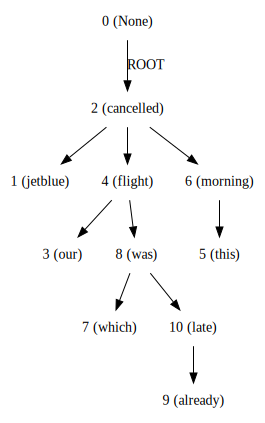

In [44]:
tr

In [45]:
# can projective dependency parser parse the same sentence?
tree = pdp.parse("jetblue cancelled our flight this morning which was already late")
for t in tree:
  print(t)

##### using Treebank data

In [46]:
nltk.download('dependency_treebank')

[nltk_data] Downloading package dependency_treebank to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/dependency_treebank.zip.


True

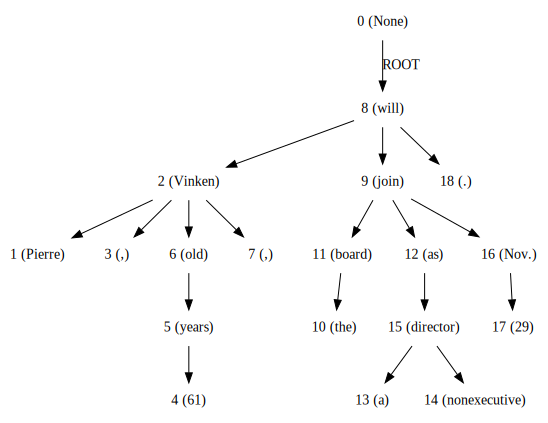

In [47]:
treebank_example = nltk.corpus.dependency_treebank.parsed_sents()[0]
treebank_example

In [48]:
# fields are word | tag | head | relation
treebank_data = """
Pierre  NNP     2       NMOD
Vinken  NNP     8       SUB
,       ,       2       P
61      CD      5       NMOD
years   NNS     6       AMOD
old     JJ      2       NMOD
,       ,       2       P
will    MD      0       ROOT
join    VB      8       VC
the     DT      11      NMOD
board   NN      9       OBJ
as      IN      9       VMOD
a       DT      15      NMOD
nonexecutive    JJ      15      NMOD
director        NN      12      PMOD
Nov.    NNP     9       VMOD
29      CD      16      NMOD
.       .       9       VMOD
"""

In [49]:
dg = DependencyGraph(treebank_data)
dg.tree().pprint()

(will
  (Vinken Pierre , (old (years 61)) ,)
  (join (board the) (as (director a nonexecutive)) (Nov. 29) .))


Useful links:

[Lark parser](https://lark-parser.readthedocs.io/en/latest/parsers.html)

### using spaCy

In [50]:
# import spacy
# nlp = spacy.load("en_core_web_sm")
# from spacy import displacy

In [51]:
doc = nlp("My brother’s dog barks a lot")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 150})

In [ ]:
# doc = nlp("Cats hate water")
# displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})
# for token in doc:
#     print(token.text,"\t", token.dep_,"\t\t","Head of this token is :", token.head.text)

In [52]:
doc = nlp("Children had fruits , snacks and cookies")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})
for token in doc:
    print("{0}({1}-{2}, {3}-{4})".format(token.dep_, token.head.text, token.head.i+1, token.text,  token.i+1, ))

nsubj(had-2, Children-1)
ROOT(had-2, had-2)
dobj(had-2, fruits-3)
punct(fruits-3, ,-4)
conj(fruits-3, snacks-5)
cc(snacks-5, and-6)
conj(snacks-5, cookies-7)


In [53]:
doc

Children had fruits , snacks and cookies

In [54]:
token_array = [token for token in doc]
print("for the token 'Snacks', n_lefts = ",token_array[4].n_lefts," n_rights = ",token_array[4].n_rights)
print("for the token 'had', n_lefts = ",token_array[1].n_lefts," n_rights = ",token_array[1].n_rights)

for the token 'Snacks', n_lefts =  0  n_rights =  2
for the token 'had', n_lefts =  1  n_rights =  1


In [55]:
print("Is 'had' the ancestor of 'fruits'? ",token_array[1].is_ancestor(token_array[2]))


Is 'had' the ancestor of 'fruits'?  True


In [56]:
# ambiguous sentence
doc = nlp("the man saw a dog in the park with a telescope")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

In [57]:
# long range dependency example
doc = nlp("The city council refused permission to the protesters because they advocated violence")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 100})

[Parsing English in 500 Lines of Python](https://explosion.ai/blog/parsing-english-in-python) is by MATTHEW HONNIBAL, who wrote spaCy.

# Demos

**This notebook won't work well Colab, as Colab doesn't support interactive screens out of the box. This should be run  locally**

In [58]:
import nltk
from nltk.app import rdparser_app, srparser_app, chartparser_app

The **recursive descent parser** maintains a tree, which records the structure of the portion of the text that has been parsed. It uses CFG productions to expand the fringe of the tree, and matches its leaves against the text.

Initially, the tree contains the start symbol (“S”). It is shown in the main canvas, to the right of the list of available expansions.

The parser builds up a tree structure for the text using three operations: **Expand, Match and Backtrack**

In [59]:
rdparser_app.app()

TclError: no display name and no $DISPLAY environment variable

The **shift-reduce parser** maintains a stack, which records the structure of the portion of the text that has been parsed. The stack is initially empty. Its contents are shown on the left side of the main canvas.

On the right side of the main canvas is the remaining text. This is the portion of the text which has not yet been considered by the parser.

The parser builds up a tree structure for the text using two operations: **Shift and Reduce**

In [60]:
srparser_app.app()

TclError: no display name and no $DISPLAY environment variable

Uses a data structure called a “chart” to record hypotheses about syntactic constituents.

bottom section -> displays the chart

middle section -> displays the sentence

top section -> displays the partial syntax tree corresponding to the selected edge

In [ ]:
chartparser_app.app()

In [61]:
doc = nlp("All that glitters is not gold")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 80})

In [62]:
doc = nlp("Make hay while the sun shines")
displacy.render(doc,style='dep',jupyter=True, options={'distance': 80})